In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import csv
import requests
from scipy import stats
from sklearn import linear_model

In [50]:
#input the data set for analysis
inputfile = "Full Data For Analysis.csv"
schools_alldata = pd.read_csv(inputfile)

In [54]:
#remove outliers and define high/low risk cities
schools_alldata_outliercrime = schools_alldata.loc[schools_alldata['Total Crime Risk (County)']<250,:]
schools_alldata_outliergrad = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Percent of High School Graduate or Higher']>40,:]

schools_city_totalc_low = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Total Crime Risk (County)']<=60,:]
schools_city_totalc_high = schools_alldata_outliercrime.loc[schools_alldata_outliercrime['Total Crime Risk (County)']>=160,:]

schools_city_assc_low = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Assault Risk (County)']<=60,:]
schools_city_assc_high = schools_alldata_outliergrad.loc[schools_alldata_outliergrad['Assault Risk (County)']>=160,:]

print(f"sample size for all cities after removing outliers is {len(schools_alldata_outliergrad)}")
print(f"sample size for low total crime risk city is {len(schools_city_totalc_low)}")
print(f"sample size for high total crime risk city is {len(schools_city_totalc_high)}")
print(f"sample size for low assault risk city is {len(schools_city_assc_low)}")
print(f"sample size for high assault risk city is {len(schools_city_assc_high)}")

sample size for all cities after removing outliers is 211
sample size for low total crime risk city is 34
sample size for high total crime risk city is 34
sample size for low assault risk city is 57
sample size for high assault risk city is 42


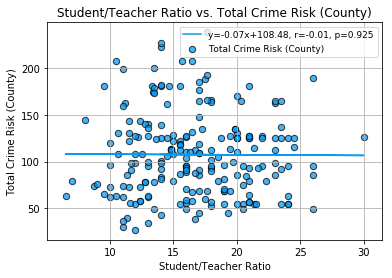

r-squared: 0.000042
sample size is 211


In [55]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)

x = schools_alldata_outliergrad['Student Teacher Ratio']
y = schools_alldata_outliergrad['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_alldata_outliergrad)))

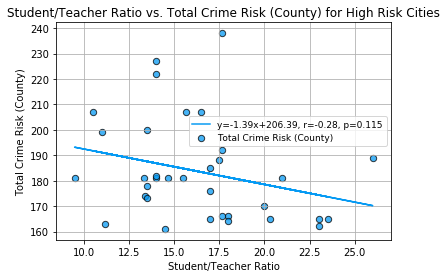

r-squared: 0.075951
sample size is 34


In [57]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
# only high total crime risk cities

x = schools_city_totalc_high['Student Teacher Ratio']
y = schools_city_totalc_high['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_totalc_high)))

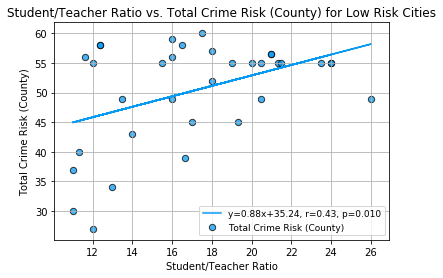

r-squared: 0.188414
sample size is 34


In [58]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
# only low total crime risk cities

x = schools_city_totalc_low['Student Teacher Ratio']
y = schools_city_totalc_low['Total Crime Risk (County)']

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Total Crime Risk (County) for Low Risk Cities")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_totalc_low)))

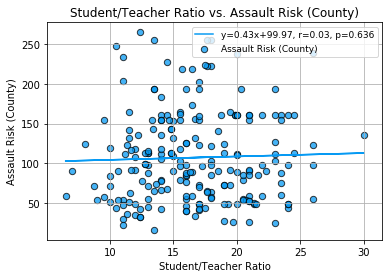

r-squared: 0.001077
sample size is 211


In [59]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
x = schools_alldata_outliergrad['Student Teacher Ratio']
y = schools_alldata_outliergrad['Assault Risk (County)']

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County)")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_alldata_outliergrad)))

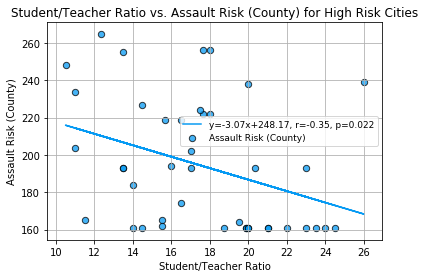

r-squared: 0.124434
sample size is 42


In [61]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
#cocrmcyasst
# only high assault risk cities

x = schools_city_assc_high['Student Teacher Ratio']
y = schools_city_assc_high['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_assc_high)))

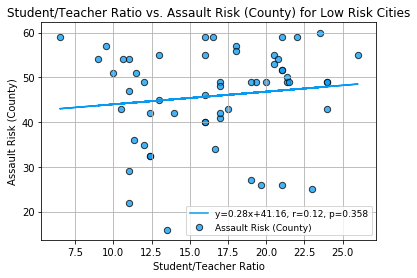

r-squared: 0.015375
sample size is 57


In [62]:
# scatter plot for Student/Teacher Ratio vs. Assault Risk (County)
# only low assault risk cities

x = schools_city_assc_low['Student Teacher Ratio']
y = schools_city_assc_low['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Student/Teacher Ratio')
plt.ylabel('Assault Risk (County)')
plt.title(f"Student/Teacher Ratio vs. Assault Risk (County) for Low Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_assc_low)))

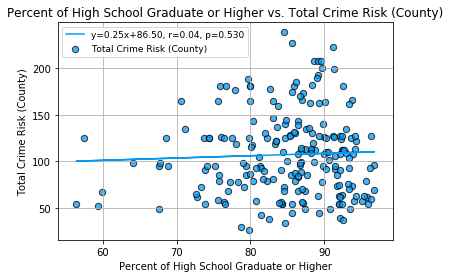

r-squared: 0.001890
sample size is 211


In [64]:
# scatter plot for Percent of High School Graduate or Higher vs. Total Crime Risk (County)

x = schools_alldata_outliergrad['Percent of High School Graduate or Higher']
y = schools_alldata_outliergrad['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_alldata_outliergrad)))

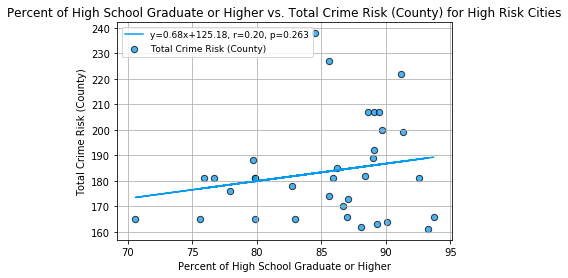

r-squared: 0.038942
sample size is 34


In [65]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
# only high Total Crime risk cities

x = schools_city_totalc_high['Percent of High School Graduate or Higher']
y = schools_city_totalc_high['Total Crime Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_totalc_high)))

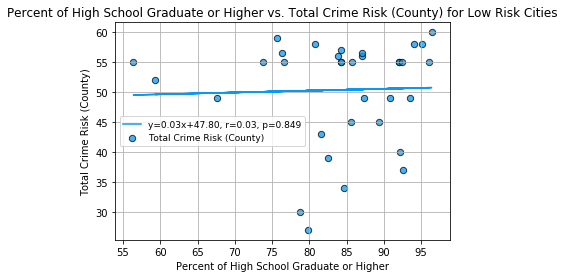

r-squared: 0.001148
sample size is 34


In [66]:
# scatter plot for Student/Teacher Ratio vs. Total Crime Risk (County)
# only low total crime risk cities
x = schools_city_totalc_low['Percent of High School Graduate or Higher']
y = schools_city_totalc_low['Total Crime Risk (County)']

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Total Crime Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Total Crime Risk (County) for Low Risk Cities")

#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))
#end

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_totalc_low)))

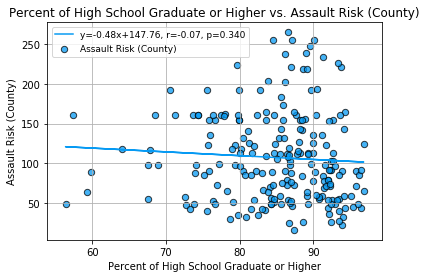

r-squared: 0.004348
sample size is 211


In [67]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)

x = schools_alldata_outliergrad['Percent of High School Graduate or Higher']
y = schools_alldata_outliergrad['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))


plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County)")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_alldata_outliergrad)))

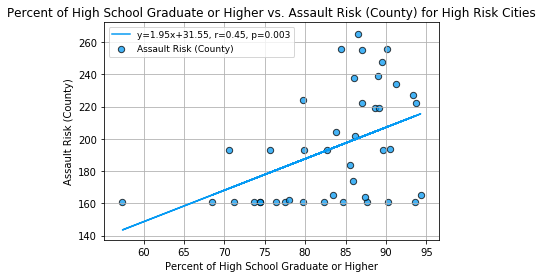

r-squared: 0.199230
sample size is 42


In [68]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)
# only high Assault risk cities

x = schools_city_assc_high['Percent of High School Graduate or Higher']
y = schools_city_assc_high['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County) for High Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_assc_high)))

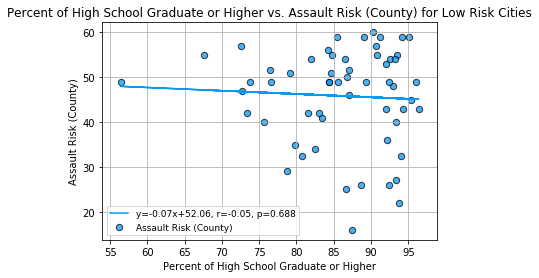

r-squared: 0.002952
sample size is 57


In [69]:
# scatter plot for Percent of High School Graduate or Higher vs. Assault Risk (County)
# only low Assault risk cities

x = schools_city_assc_low['Percent of High School Graduate or Higher']
y = schools_city_assc_low['Assault Risk (County)']

#regression calculation
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, color="xkcd:azure", label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.3f}'.format(slope,intercept,r_value,p_value))

plt.grid()
plt.xlabel('Percent of High School Graduate or Higher')
plt.ylabel('Assault Risk (County)')
plt.title(f"Percent of High School Graduate or Higher vs. Assault Risk (County) for Low Risk Cities")

plt.scatter(x, y, marker="o", 
            facecolors="xkcd:azure", edgecolors="black",
            s=40, alpha=0.75)
plt.legend(fontsize=9)


plt.show()
print("r-squared: %f" % r_value**2)
print("sample size is "+str(len(schools_city_assc_low)))

In [70]:
# try to predict total crime risk with two predictors both student/teacher ratio and percent of high school graduate or higher

X = schools_alldata_outliergrad[['Student Teacher Ratio','Percent of High School Graduate or Higher']]
y1 = schools_alldata_outliergrad['Total Crime Risk (County)']

model1 = linear_model.LinearRegression().fit(X, y1)
print(model1.score(X, y1))

0.0018902085970077254


In [72]:
# try to predict assault risk with two predictors both student/teacher ratio and percent of high school graduate or higher

X = schools_alldata_outliergrad[['Student Teacher Ratio','Percent of High School Graduate or Higher']]
y2 = schools_alldata_outliergrad['Assault Risk (County)']

model2 = linear_model.LinearRegression().fit(X, y2)
print(model2.score(X, y2))

0.004927035969655935


In [84]:
# try to predict total crime risk with two predictors both student/teacher ratio and percent of high school graduate or higher
# low total crime risk cities

X3 = schools_city_totalc_low[['Student Teacher Ratio','Percent of High School Graduate or Higher']]
y3 = schools_city_totalc_low['Total Crime Risk (County)']

model3 = linear_model.LinearRegression().fit(X3, y3)

#print out result
print(f"- r-square is {model3.score(X3, y3)}")
print(f"- coefficients values of student teacher ratio and percent of high school graduates or higher are {model3.coef_}")
print(f"- intercept values are {model3.intercept_}")

- r-square is 0.20038201217787377
- coefficients values of student teacher ratio and percent of high school graduates or higher are [0.92185036 0.1006534 ]
- intercept values are 26.11367241154491


In [83]:
# try to predict total crime risk with two predictors both student/teacher ratio and percent of high school graduate or higher
# high assault risk cities

X4 = schools_city_assc_high[['Student Teacher Ratio','Percent of High School Graduate or Higher']]
y4 = schools_city_assc_high['Total Crime Risk (County)']

model4 = linear_model.LinearRegression().fit(X4, y4)

#print out result
print(f"- r-square is {model4.score(X4, y4)}")
print(f"- coefficients values of student teacher ratio and percent of high school graduates or higher are {model4.coef_}")
print(f"- intercept values are {model4.intercept_}")

- r-square is 0.12732173435177407
- coefficients values of student teacher ratio and percent of high school graduates or higher are [-2.1056531  0.6666407]
- intercept values are 135.49598982167848
